In [2]:
import os
import matplotlib.pyplot as plt
from math import log
import pandas as pd

In [3]:
wiki_dir = '/Users/k/Docs/School/Tuebingen/Thesis/Corpuses/ShortenedWiki/'
files = [os.path.join(wiki_dir, file) for file in os.listdir(wiki_dir) if file.endswith('.txt')]

Type-Token Ratio

In [4]:
ttr_values = []
languages = []
for file_path in files:
    languages.append(os.path.splitext(os.path.basename(file_path))[0].split('_')[0])
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()
    f.close()
    tokens = text.split()
    total_tokens = len(tokens)
    types = set(tokens)
    total_types = len(types)
    ttr_values.append((total_types / total_tokens) * 100)


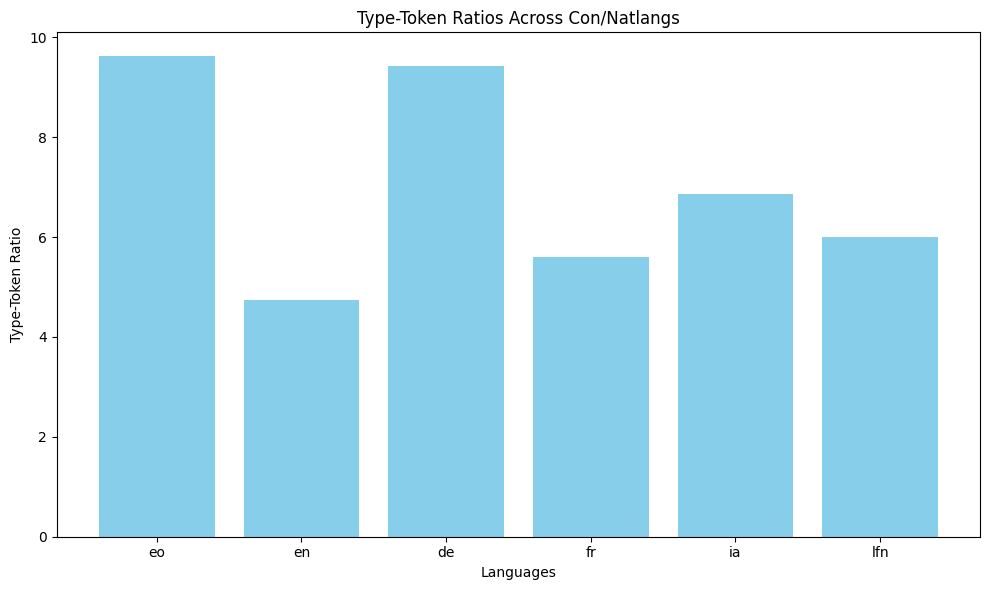

In [5]:
plt.figure(figsize=(10, 6))
plt.bar(languages, ttr_values, color='skyblue')

plt.xlabel('Languages')
plt.ylabel('Type-Token Ratio')
plt.title('Type-Token Ratios Across Con/Natlangs')

plt.tight_layout()
plt.show()

Moving Average Type-Token Ratio

In [6]:
def calculate_mattr(file, window_size):
    
    with open(file, 'r', encoding='utf-8') as f:
        text = f.read()
    f.close()
    
    tokens = text.split()
    total_tokens = len(tokens)
    
    ttr_values = []
    for i in range(total_tokens - window_size + 1):
        window = tokens[i:i + window_size]
        types = set(window)
        total_types = len(types)
        ttr = total_types / window_size
        ttr_values.append(ttr)

    mattr = sum(ttr_values) / len(ttr_values)
    return mattr

mattr_values = {}
window_size = 100  
for file in files:
    lang = os.path.splitext(os.path.basename(file))[0].split('_')[0]
    mattr_values[lang] = calculate_mattr(file, window_size)

In [7]:
print(mattr_values)

{'eo': 0.6972314165619563, 'en': 0.6909203472640336, 'de': 0.7527035936267579, 'fr': 0.7031279540254466, 'ia': 0.6664953232243979, 'lfn': 0.6211959694977615}


Character Entropy

In [8]:
def log2(number):
    return log(number) / log(2)

def calculate_char_entropy(file):
    with open(file, 'r', encoding='utf-8') as f:
        text = f.read()
    f.close()
    
    char_freq = {}
    for char in text:
        if char in char_freq:
            char_freq[char] += 1
        else:
            char_freq[char] = 1
            
    length_sum = 0.0
    for char in char_freq:
        p = float(char_freq[char]) / len(text)
        length_sum += p * log2(p)
        
    return -length_sum

char_entropies = {}
for file in files:
    lang = os.path.splitext(os.path.basename(file))[0].split('_')[0]
    char_entropies[lang] = calculate_char_entropy(file)

In [9]:
print(char_entropies)

{'eo': 4.1992583761232485, 'en': 4.150509528896986, 'de': 4.20959808898407, 'fr': 4.150439160230042, 'ia': 4.0969415616417955, 'lfn': 3.9800159844483396}


Word Entropy

In [21]:
def log2(number):
    return log(number) / log(2)

def calculate_word_entropy(file):
    with open(file, 'r', encoding='utf-8') as f:
        text = f.read()
    f.close()
    
    word_freq = {}
    total_words = 0
    for word in text.split():
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1
        total_words += 1
            
    length_sum = 0.0
    for word in word_freq:
        p = float(word_freq[word]) / total_words
        length_sum += p * log2(p)
        
    return -length_sum

word_entropies = {}
for file in files:
    lang = os.path.splitext(os.path.basename(file))[0].split('_')[0]
    word_entropies[lang] = calculate_word_entropy(file)

In [22]:
print(word_entropies)

{'eo': 11.710764322858413, 'en': 11.114568327086296, 'de': 12.088003652240003, 'fr': 11.10891781461096, 'ia': 11.407395241874681, 'lfn': 10.313962521014572}


Dataframe